DESCRIPTION
Background of Problem Statement :
NYC 311's mission is to provide the public with quick and easy access to all New York City
government services and information while offering the best customer service. Each day,
NYC311 receives thousands of requests related to several hundred types of non-emergency
services, including noise complaints, plumbing issues, and illegally parked cars. These requests
are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or
transportation. The agency responds to the request, addresses it, and then closes it.
Problem Objective :
Perform a service request data analysis of New York City 311 calls. You will focus on the data
wrangling techniques to understand the pattern in the data and also visualize the major complaint
types.
Domain: Customer Service
Analysis Tasks to be performed:
(Perform a service request data analysis of New York City 311 calls)
1. Import a 311 NYC service request.
2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and
create a new column ‘Request_Closing_Time’ as the time elapsed between request
creation and request closing. (Hint: Explore the package/module datetime)
3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at
least 4 major conclusions that you can come up with after generic data mining.
4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them
for different locations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import plotly.offline as iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [3]:
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\Chetan\anaconda3\anaconda3\New folder\envs\py38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [6]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [7]:
del df['School or Citywide Complaint']
del df['Vehicle Type']
del df['Taxi Company Borough']
del df['Taxi Pick Up Location']
del df['Bridge Highway Name']
del df['Bridge Highway Direction']
del df['Road Ramp']
del df['Bridge Highway Segment']
del df['Garage Lot Name']
del df['Ferry Direction']
del df['Ferry Terminal Name']
del df['Landmark']
del df["School Phone Number"]
del df["School Address"]
del df["School Name"]
del df["School Region"]
del df["School Code"]
del df['School Not Found']
del df["School Zip"]
del df["School State"]
del df["School City"]
del df['Park Borough']
del df['Unique Key']
del df['Agency']
del df['Latitude']
del df['Longitude']
del df["School Number"]
del df["Facility Type"]
del df["Park Facility Name"]
del df['Borough']

In [8]:
import datetime as dt
import time, datetime

In [9]:
df['Created Date'] = pd.to_datetime(df['Created Date'])

In [10]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [11]:
df['Due Date'] = pd.to_datetime(df['Due Date'])

In [12]:
df['Resolution Action Updated Date'] = pd.to_datetime(df['Resolution Action Updated Date'])

In [13]:
df['incident_adress'] = df['Incident Address'].str.split(' ').str[1]

In [14]:
df['incident_adress'].value_counts() 

EAST        23866
WEST        18897
AVENUE       7512
STREET       3825
BROADWAY     3068
            ...  
JAQUES          1
ACORN           1
LAVA            1
LOW             1
182ND           1
Name: incident_adress, Length: 3697, dtype: int64

In [15]:
del df["Incident Address"]

In [16]:
df['board'] = df['Community Board'].str.split(' ').str[1]

In [17]:
del df['Community Board']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Created Date                    300698 non-null  datetime64[ns]
 1   Closed Date                     298534 non-null  datetime64[ns]
 2   Agency Name                     300698 non-null  object        
 3   Complaint Type                  300698 non-null  object        
 4   Descriptor                      294784 non-null  object        
 5   Location Type                   300567 non-null  object        
 6   Incident Zip                    298083 non-null  float64       
 7   Street Name                     256288 non-null  object        
 8   Cross Street 1                  251419 non-null  object        
 9   Cross Street 2                  250919 non-null  object        
 10  Intersection Street 1           43858 non-null   object 

In [19]:
df['Request_Closing_Time'] = df['Closed Date']-df['Created Date']
df['Request_Closing_Time'].head()

0   0 days 00:55:15
1   0 days 01:26:16
2   0 days 04:51:31
3   0 days 07:45:14
4   0 days 03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [28]:
df['Request_Closing_Time'] = df['Closed Date']-df['Created Date']
df['Request_Closing_Time'].head()
Request_Closing_Time=[]
for x in (df["Closed Date"]-df["Created Date"]):
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
    
df["Request_Closing_Time"]=Request_Closing_Time

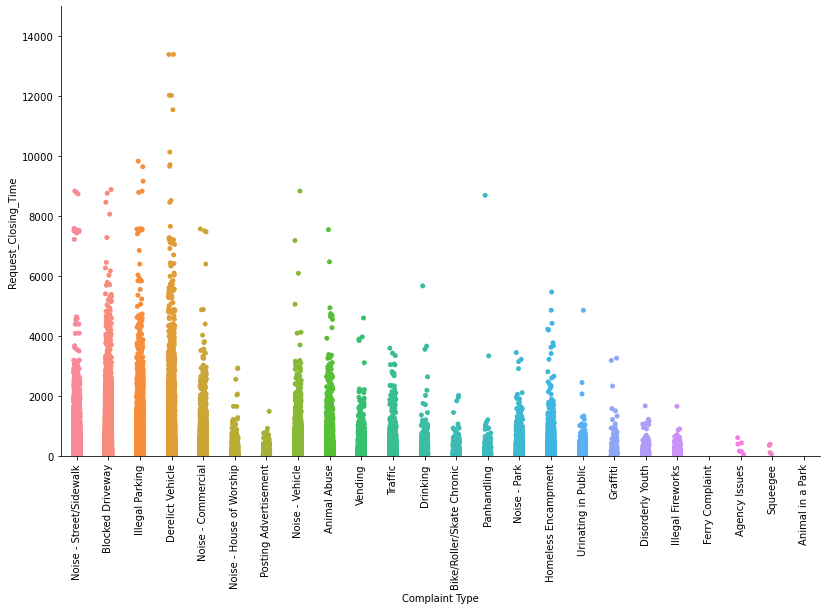

In [40]:
x=sb.catplot(x='Complaint Type', y="Request_Closing_Time",data=df)
x.fig.set_figwidth(15)
x.fig.set_figheight(7)
plt.xticks(rotation=90)
plt.ylim((0,15000))
plt.show()

In [23]:
data = df[["Status","Location Type"]].value_counts()
data

Status    Location Type             
Closed    Street/Sidewalk               247503
          Store/Commercial               20183
          Club/Bar/Restaurant            17227
          Residential Building/House      6953
          Park/Playground                 4751
Open      Street/Sidewalk                 1204
Closed    House of Worship                 927
Assigned  Street/Sidewalk                  591
Closed    Residential Building             227
          Highway                          214
Open      Store/Commercial                 122
Closed    Parking Lot                      117
          House and Store                   93
Assigned  Club/Bar/Restaurant               80
Closed    Vacant Lot                        77
Assigned  Store/Commercial                  76
Closed    Commercial                        62
Open      Club/Bar/Restaurant               53
Closed    Roadway Tunnel                    35
          Subway Station                    34
Assigned  Park/Playgrou

<AxesSubplot:ylabel='board'>

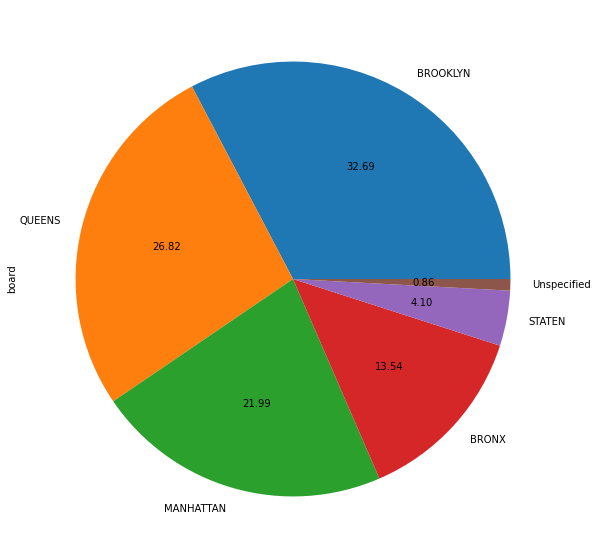

In [24]:
df['board'].value_counts().plot.pie(autopct = '%.2f',figsize = (15,10))

Brooklyn board has highest number complaints.

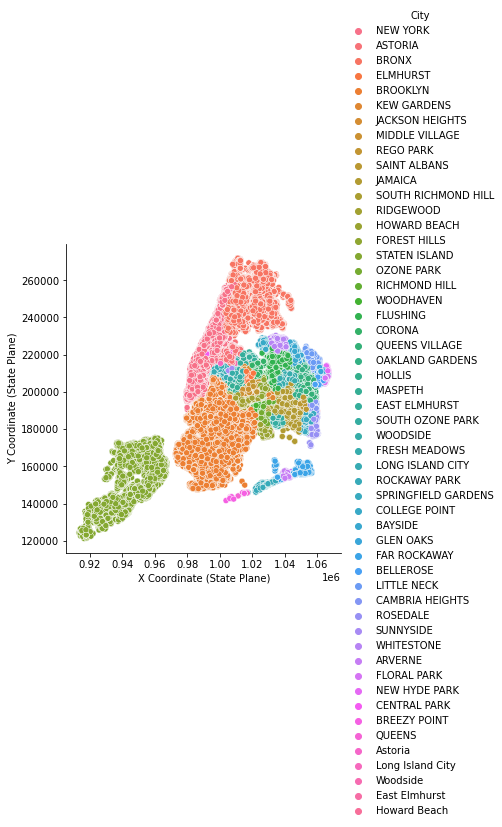

In [25]:
sb.relplot(x='X Coordinate (State Plane)',y='Y Coordinate (State Plane)',hue='City',data = df)

The cities with respect to state coordinates and each colour represents the city in the scatter plot.

In [42]:
df["Status"].value_counts().sort_values(ascending = False).iplot(kind = "bar")

Closed cases are more compare to open, assigned and draft cases.

In [43]:
df["Location Type"].value_counts().sort_values(ascending = False).iplot(kind = "bar")

Complaints of Street/Sidewalk are more compare to other cases.

In [26]:
df['Request_Closing_Time'] = df['Closed Date']-df['Created Date']
df['Request_Closing_Time'].head()

0   0 days 00:55:15
1   0 days 01:26:16
2   0 days 04:51:31
3   0 days 07:45:14
4   0 days 03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [37]:
#Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
x = df.groupby(["City","Complaint Type"]).Request_Closing_Time.mean()
x.head(50)

City     Complaint Type           
ARVERNE  Animal Abuse                 129.217544
         Blocked Driveway             151.558095
         Derelict Vehicle             178.093210
         Disorderly Youth             215.475000
         Drinking                      14.316667
         Graffiti                      92.000000
         Homeless Encampment          108.887500
         Illegal Parking              138.981897
         Noise - Commercial           137.233333
         Noise - House of Worship      93.731818
         Noise - Park                  77.000000
         Noise - Street/Sidewalk      119.543678
         Noise - Vehicle              111.592857
         Panhandling                   62.000000
         Urinating in Public           41.516667
         Vending                       29.000000
ASTORIA  Animal Abuse                 300.010133
         Bike/Roller/Skate Chronic    104.358889
         Blocked Driveway             288.967068
         Derelict Vehicle         